In [6]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd

# Sample data (Cloudiness, windiness) and labels (0 for no rain, 1 for rain)
# Lets say 0-5 is less likely for rain and 6-10 is more likely for rain
X = np.array([[1,2],[2,3],[3,1],[5,2],[7,8],[8,7],[9,9],[6,6]])
y = np.array([0,0,0,0,1,1,1,1])

df = pd.DataFrame(X, columns =['cloudiness','windiness'])
df['rain'] = y
df

,cloudiness,windiness,rain
0,1,2,0
1,2,3,0
2,3,1,0
3,5,2,0
4,7,8,1
5,8,7,1
6,9,9,1
7,6,6,1


In [9]:
# Create a Logistic Regression Model
model = LogisticRegression()

# Train the model
model.fit(X,y)

# Now, let's predict if it will rain with new data
# Example : Cloudiness = 4, Windiness = 6
new_data = np.array([[2,3]])
prediction = model.predict(new_data)

# The prediction result: 0 for no rain, 1 for rain
prediction[0]

np.int64(0)

Que 1 - Let's use the weights and bias  from our trained logistic regression model to calculate the probability of rain for the new data point (Cloudiness =4, Windeness = 6) using this Mathematical approach.

In [10]:
# Retrive the learned weights(coefficient) and bias (intercept) from the model
weights = model.coef_[0]
bias = model.intercept_[0]

# print the weights and bias
print('Weights:',weights)
print('Bias:',bias)

# New data point
cloudiness, windiness = 4,6

# calculate the linear combination(z)
z = bias+weights[0]*cloudiness+ weights[1]*windiness

# Apply the logistic(sigmoid) function to compute the probability
probability_of_rain = 1/(1+np.exp(-z))

print("Probability of raining:", probability_of_rain)

Weights: [0.53298223 0.82509307]
Bias: -6.404848430627816
Probability of raining: 0.6632115264942609


The calculate probability of rain for the new data point (Cloudiness =4, Windiness = 6) is approximately 0.663, or 66.3%. This means, according to our logistic regression model, there's 66.3% chance of rain given these conditions.


In logistic Regression, if this probability is above the usual threshold of 0.5, we predict the outcome as "1"(rain in this case). Since our probability is above 0.5, it aligns  with our earlier prediction of rain. The demonstrate how logistic regression estimates mathematically estimates probabilities and make predictions based on input features.

# **Implementing Logistic Regression in Python**

Let us now start implementing what we learned from the previous section into python codes. We will use the Telco Customer Churn data.

## **What is Churn Prediction?**

Churn prediction is analytical studies on the possibility of a customer abandoning a product or service. The goal is to understand and take steps to change it before the customer gives up the product or service.

## **About Data**

1. customerID : Customer ID
2. gender : Whether the customer is a male or a female
3. SeniorCitizen : Whether the customer is a senior citizen or not (1, 0)
4. Partner : Whether the customer has a partner or not (Yes, No)
5. Dependents : Whether the customer has dependents or not (Yes, No)
6. tenure : Number of months the customer has stayed with the company
7. PhoneService : Whether the customer has a phone service or not (Yes, No)
8. MultipleLines : Whether the customer has multiple lines or not (Yes, No, No phone service)
9. InternetService : Customer’s internet service provider (DSL, Fiber optic, No)
10. OnlineSecurity : Whether the customer has online security or not (Yes, No, No internet service)
11. OnlineBackup : Whether the customer has online backup or not (Yes, No, No internet service)
12. DeviceProtection : Whether the customer has device protection or not (Yes, No, No internet service)
13. TechSupport : Whether the customer has tech support or not (Yes, No, No internet service)
14. StreamingTV : Whether the customer has streaming TV or not (Yes, No, No internet service)
15. StreamingMovies : Whether the customer has streaming movies or not (Yes, No, No internet service)
16. Contract : The contract term of the customer (Month-to-month, One year, Two year)
17. PaperlessBilling : Whether the customer has paperless billing or not (Yes, No)
18. PaymentMethod : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
19. MonthlyCharges : The amount charged to the customer monthly
20. TotalCharges : The total amount charged to the customer
21. Churn : Whether the customer churned or not (Yes or No)

Churn : Whether the customer churned or not (Yes or No)
#### **Dataset Link:**"https://drive.google.com/file/d/1dFkT-RNfbogbL76rx3O-LgMte2XcuKpg/view?usp=sharing"

#### **Dataset Initialization**

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
print("Dataset Size")
print("Rows {} Columns {}".format(df.shape[0], df.shape[1]))

Dataset Size
Rows 7043 Columns 21


In [12]:
print("Column and data types")
pd.DataFrame(df.dtypes).rename(columns = {0:'dtype'})

Column and data types


,dtype
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


That's lot of columns, to simplify our experiment we will only use 2 freatures **tenure** and **MonthlyCharges** and the target would be **Churn** of course. Let us do a simple EDA and visualization on our features and target.

## **EDA:** Independent Varibales

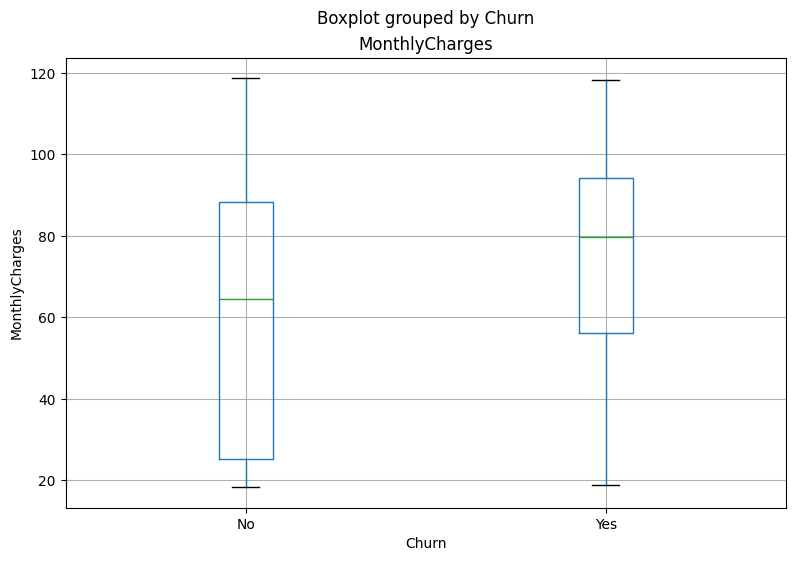

In [13]:
fig = plt.figure(figsize =(9,6))
ax = fig.gca()
df.boxplot(column ='MonthlyCharges',by ='Churn', ax = ax)
ax.set_ylabel("MonthlyCharges")
plt.show()

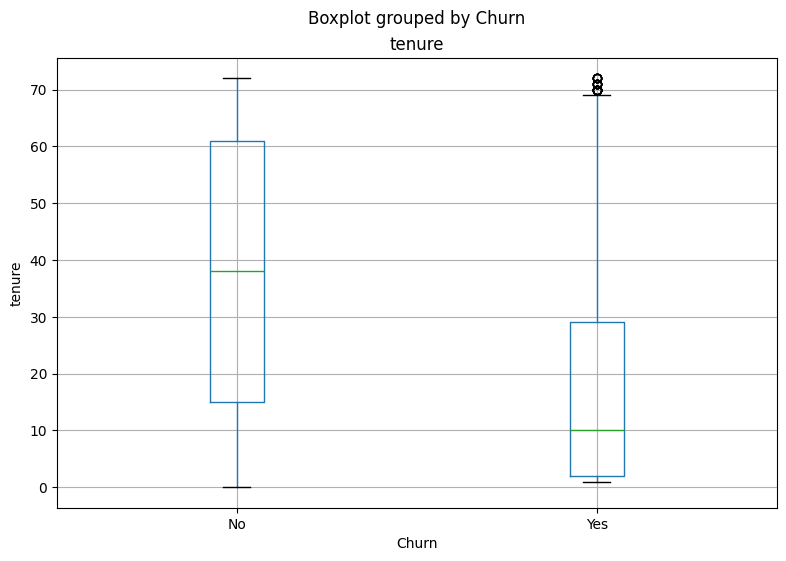

In [15]:
fig = plt.figure(figsize=(9,6))
ax = fig.gca()
df.boxplot(column ='tenure', by ='Churn', ax = ax)
ax.set_ylabel("tenure")
plt.show()

###### **Insights from our simple EDA:**
* We can see a difference between our target classes on tenure as you can see in the second boxplot, which is good because our model(Logistic Regression) may use this to separate the two classes.

* There is also a slight difference betweeen our target classses on monthly charges as shown in the first boxplot.

Before we start predicting, an important step to do is to convert our **Churn** feature, which is a string into integer. Yes will be converted to 1 and No will be converted to 0. We will name this new columns a "class".

In [16]:
df['class'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
# features will be saved as X and our target will be saves as  y
X = df[['tenure','MonthlyCharges']].copy()
y = df['class'].copy()

In [17]:
df.shape

(7043, 22)

### **Splitting data into Train and Test**

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(5634, 2)
(1409, 2)


In [21]:
 y_train.value_counts()

,count
class,
0,4133
1,1501


In [22]:
y_test.value_counts()

,count
class,
0,1041
1,368


#### **Fitting Logistic Regression Model on train data**

In [23]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [24]:
# Get the model coefficient and intercept
print(clf.coef_)
print(clf.intercept_)

[[-0.05646759  0.03315394]]
[-1.77408798]


In [25]:
# Get the predicted probabilties
train_preds = clf.predict_proba(X_train)
test_preds = clf.predict_proba(X_test)

In [26]:
# Get the predicted classes
train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)

[[3745  388]
 [ 819  682]]


[Text(0, 0.5, 'Retained'), Text(0, 1.5, 'Churned')]

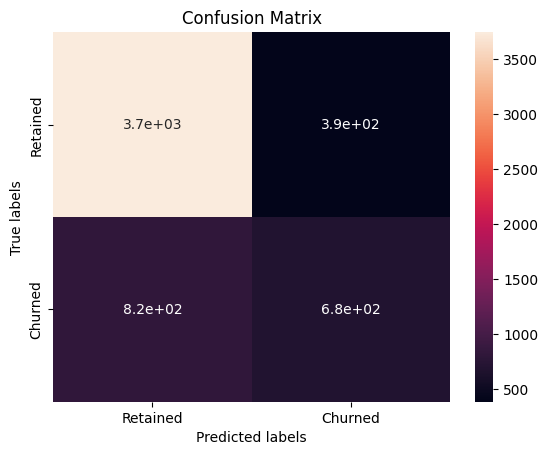

In [27]:
# Get the confusion Matrix for train and test
from sklearn.metrics import confusion_matrix
import seaborn as sns

labels = ['Retained','Churned']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax = plt.subplot()
sns.heatmap(cm, annot= True, ax = ax) # annot = True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[934 107]
 [212 156]]


[Text(0, 0.5, 'Retained'), Text(0, 1.5, 'Churned')]

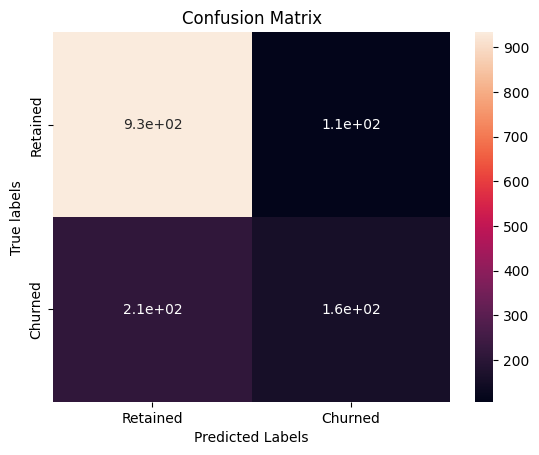

In [28]:
# Get the confusion matrix for both train and test

labels = ['Retained','Churned']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax); # annot = True to annotate cells

# labels , title and ticks
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

### **Accuracy**

In [29]:
from sklearn.metrics import accuracy_score
# Get the accuracy scores
test_accuracy = accuracy_score(y_test, test_class_preds)
print("The accuracy on test data is", test_accuracy)

The accuracy on test data is 0.7735982966643009


### **Precision**

In [30]:
from sklearn.metrics import precision_score
# Get the Precision score
test_precision = precision_score(y_test, test_class_preds)
print("The precision on test data is ", test_precision)

The precision on test data is  0.5931558935361216


### **Recall(Sensitivity)**

In [31]:
from sklearn.metrics import recall_score
# Get the recall scores
test_recall = recall_score(y_test, test_class_preds)
print("The recall on test data is", test_recall)

The recall on test data is 0.42391304347826086


### **F1-Score**

In [32]:
from sklearn.metrics import f1_score
# Get the f1 scores
test_f1 = f1_score(y_test, test_class_preds)
print("The f1 score on test data is", test_f1)

The f1 score on test data is 0.49445324881141045


### **Log Loss**

In [33]:
from sklearn.metrics import log_loss
# Get the log loss function
test_log_loss = log_loss(y_test, test_preds)
print("The log loss score on test data is", test_log_loss)

The log loss score on test data is 0.4686725617004556


### **AUC-ROC**

In [34]:
from sklearn.metrics import roc_auc_score
# Get the roc auc score
test_roc_auc_score = roc_auc_score(y_test, test_preds[:,1])
print("The ROC AUC Score on the test data is ", test_roc_auc_score)

The ROC AUC Score on the test data is  0.7859408282170155


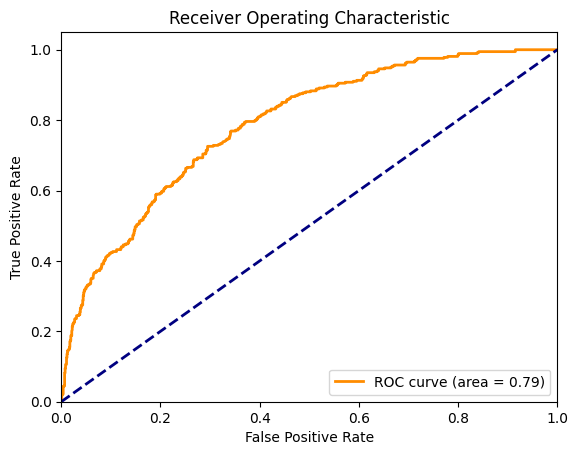

In [36]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you already have your model predictions (probabilites)
# For example, using: predictions = model.predict_prob(X_test)[:,1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, test_preds[:,1])

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plotting
plt.figure()
plt.plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color ='navy', lw =2, linestyle ='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc = "lower right")
plt.show()

Each of these metrics provides a different insight into the performance of a classification model. It's often useful to consider multiple metrics when evaluating a model, as each has its strengths and weaknesses depending on the specific characteristics of the dataset and the business problem.